In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---
# Mouse
### Quake_10x_Heart_and_Aorta

/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P7_4_AAACCTGCACGACGAA,endothelial cell,CL:0000115,endothelial cell,0.0,Quake_10x_Heart_and_Aorta,3-F-56,endothelial cell,F,Heart and Aorta,Mus musculus,10X_P7_4,10x,
10X_P7_4_AAACCTGGTTCCACGG,fibroblast,CL:0000057,fibroblast,2.0,Quake_10x_Heart_and_Aorta,3-F-56,fibroblast,F,Heart and Aorta,Mus musculus,10X_P7_4,10x,
10X_P7_4_AAACCTGTCTCGATGA,endothelial cell,CL:0000115,endothelial cell,0.0,Quake_10x_Heart_and_Aorta,3-F-56,endothelial cell,F,Heart and Aorta,Mus musculus,10X_P7_4,10x,
10X_P7_4_AAACGGGAGCGCTCCA,erythrocyte,CL:0000232,erythrocyte,3.0,Quake_10x_Heart_and_Aorta,3-F-56,erythrocyte,F,Heart and Aorta,Mus musculus,10X_P7_4,10x,
10X_P7_4_AAAGCAAAGTGAATTG,fibroblast,CL:0000057,fibroblast,1.0,Quake_10x_Heart_and_Aorta,3-F-56,fibroblast,F,Heart and Aorta,Mus musculus,10X_P7_4,10x,


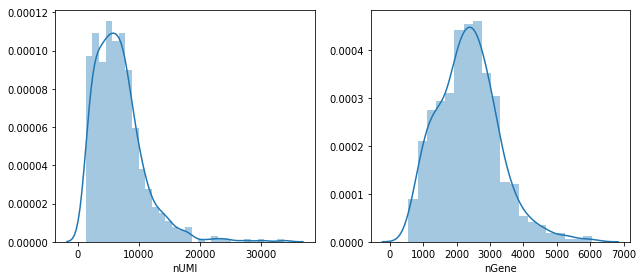

In [2]:
quake_10x_heart_and_aorta = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Heart_and_Aorta/data.h5")
utils.peek(quake_10x_heart_and_aorta, "Quake_10x_Heart_and_Aorta")
quake_10x_heart_and_aorta = quake_10x_heart_and_aorta.normalize()
quake_10x_heart_and_aorta.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_heart_and_aorta_model = cb.directi.fit_DIRECTi(
    quake_10x_heart_and_aorta, quake_10x_heart_and_aorta.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Heart_and_Aorta/model_0"
)
quake_10x_heart_and_aorta.latent = quake_10x_heart_and_aorta_model.inference(quake_10x_heart_and_aorta)

[DIRECTi epoch 0] train=1.861, val=1.982, time elapsed=2.7s Regular save...
[DIRECTi epoch 1] train=1.864, val=1.982, time elapsed=0.1s
[DIRECTi epoch 2] train=1.859, val=1.982, time elapsed=0.1s
[DIRECTi epoch 3] train=1.866, val=1.981, time elapsed=0.1s
[DIRECTi epoch 4] train=1.864, val=1.981, time elapsed=0.1s
[DIRECTi epoch 5] train=1.860, val=1.981, time elapsed=0.1s
[DIRECTi epoch 6] train=1.866, val=1.980, time elapsed=0.1s
[DIRECTi epoch 7] train=1.856, val=1.979, time elapsed=0.1s
[DIRECTi epoch 8] train=1.860, val=1.979, time elapsed=0.1s
[DIRECTi epoch 9] train=1.864, val=1.978, time elapsed=0.1s
[DIRECTi epoch 10] train=1.858, val=1.977, time elapsed=0.1s Regular save...
[DIRECTi epoch 11] train=1.859, val=1.976, time elapsed=0.1s
[DIRECTi epoch 12] train=1.862, val=1.974, time elapsed=0.1s
[DIRECTi epoch 13] train=1.859, val=1.973, time elapsed=0.1s
[DIRECTi epoch 14] train=1.856, val=1.971, time elapsed=0.1s
[DIRECTi epoch 15] train=1.855, val=1.969, time elapsed=0.1s
[D

[  Info   ] Computing tSNE...


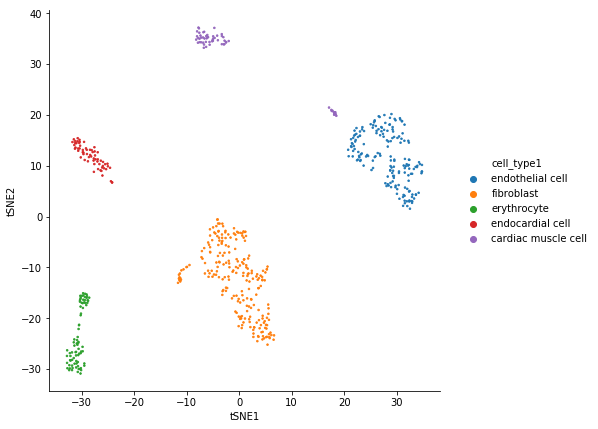

In [4]:
plot = quake_10x_heart_and_aorta.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Heart_and_Aorta/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


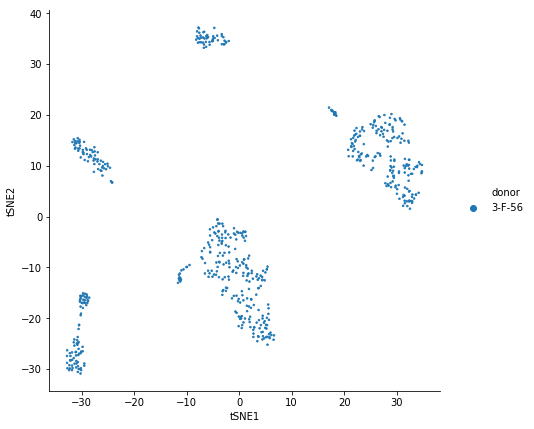

In [5]:
plot = quake_10x_heart_and_aorta.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Heart_and_Aorta/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
quake_10x_heart_and_aorta_models = [quake_10x_heart_and_aorta_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_heart_and_aorta_models.append(cb.directi.fit_DIRECTi(
        quake_10x_heart_and_aorta, quake_10x_heart_and_aorta.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Heart_and_Aorta/model_%d" % i
    ))
quake_10x_heart_and_aorta_blast = cb.blast.BLAST(quake_10x_heart_and_aorta_models, quake_10x_heart_and_aorta, 
                                               keep_exprs=True).build_empirical()
quake_10x_heart_and_aorta_blast.save("Quake_10x_Heart_and_Aorta")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Heart_and_Aorta/model_1/checkpoint-296
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Heart_and_Aorta/model_2/checkpoint-349
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Heart_and_Aorta/model_3/checkpoint-343


In [7]:
with open("Quake_10x_Heart_and_Aorta/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Heart_and_Aorta/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(quake_10x_heart_and_aorta_blast, "Quake_10x_Heart_and_Aorta")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9028
Accuracy = 1.0000


### Quake_Smart-seq2_Heart

/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
B12.MAA000398.3_9_M.1.1,fibroblast,CL:0000057,fibroblast,MAA000398,1.0,Quake_Smart-seq2_Heart,3_9_M,fibroblast,M,Heart,Mus musculus,Smart-seq2,LA
D16.MAA000398.3_9_M.1.1,endothelial cell,CL:0000115,endothelial cell,MAA000398,5.0,Quake_Smart-seq2_Heart,3_9_M,endothelial cell,M,Heart,Mus musculus,Smart-seq2,LA
F10.MAA000398.3_9_M.1.1,myofibroblast cell,CL:0000186,myofibroblast cell,MAA000398,7.0,Quake_Smart-seq2_Heart,3_9_M,Myofibroblast,M,Heart,Mus musculus,Smart-seq2,LA
L17.MAA000398.3_9_M.1.1,myofibroblast cell,CL:0000186,myofibroblast cell,MAA000398,7.0,Quake_Smart-seq2_Heart,3_9_M,Myofibroblast,M,Heart,Mus musculus,Smart-seq2,LA
N18.MAA000398.3_9_M.1.1,fibroblast,CL:0000057,fibroblast,MAA000398,1.0,Quake_Smart-seq2_Heart,3_9_M,fibroblast,M,Heart,Mus musculus,Smart-seq2,LA


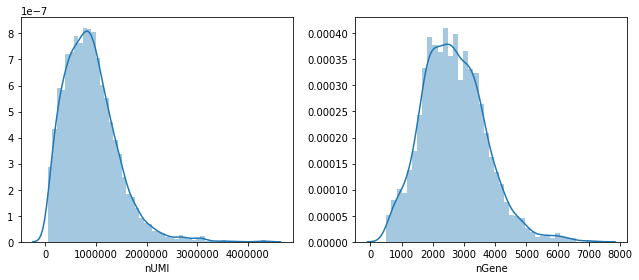

In [9]:
quake_smart_seq2_heart = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Heart/data.h5")
utils.peek(quake_smart_seq2_heart, "Quake_Smart-seq2_Heart")
quake_smart_seq2_heart = quake_smart_seq2_heart.normalize()
quake_smart_seq2_heart.obs.head()

In [10]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_heart_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_heart, quake_smart_seq2_heart.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Heart/model_0"
)
quake_smart_seq2_heart.latent = quake_smart_seq2_heart_model.inference(quake_smart_seq2_heart)

[DIRECTi epoch 0] train=3.085, val=3.150, time elapsed=1.4s Regular save...
[DIRECTi epoch 1] train=3.066, val=3.124, time elapsed=0.4s
[DIRECTi epoch 2] train=3.036, val=3.085, time elapsed=0.4s
[DIRECTi epoch 3] train=2.957, val=2.903, time elapsed=0.4s
[DIRECTi epoch 4] train=1.882, val=1.136, time elapsed=0.4s
[DIRECTi epoch 5] train=1.011, val=1.053, time elapsed=0.4s
[DIRECTi epoch 6] train=0.991, val=1.023, time elapsed=0.4s
[DIRECTi epoch 7] train=0.989, val=1.029, time elapsed=0.4s
[DIRECTi epoch 8] train=0.988, val=1.031, time elapsed=0.4s
[DIRECTi epoch 9] train=0.978, val=0.987, time elapsed=0.4s
[DIRECTi epoch 10] train=0.931, val=0.959, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=0.911, val=0.956, time elapsed=0.4s
[DIRECTi epoch 12] train=0.905, val=0.978, time elapsed=0.4s
[DIRECTi epoch 13] train=0.896, val=0.931, time elapsed=0.4s
[DIRECTi epoch 14] train=0.887, val=0.917, time elapsed=0.4s
[DIRECTi epoch 15] train=0.877, val=0.911, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


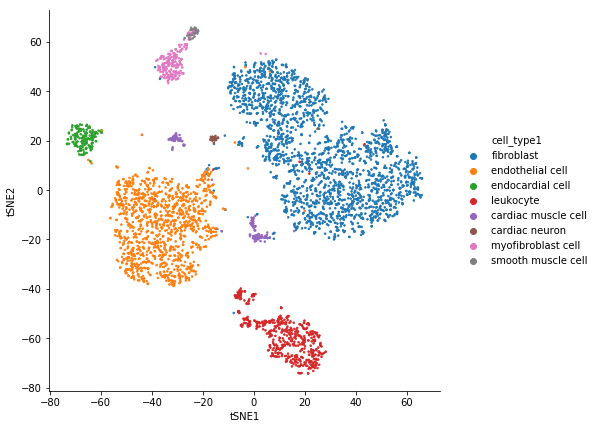

In [11]:
plot = quake_smart_seq2_heart.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Heart/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


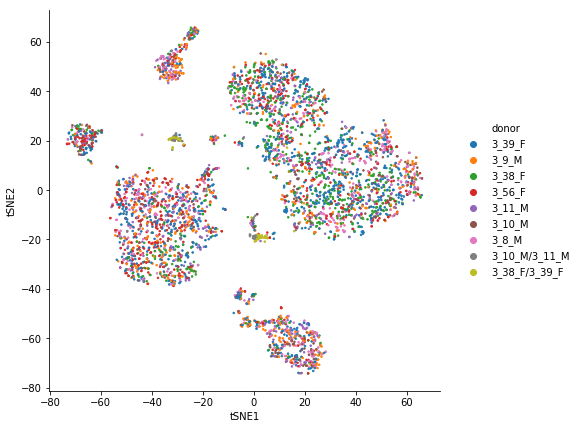

In [12]:
plot = quake_smart_seq2_heart.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Heart/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


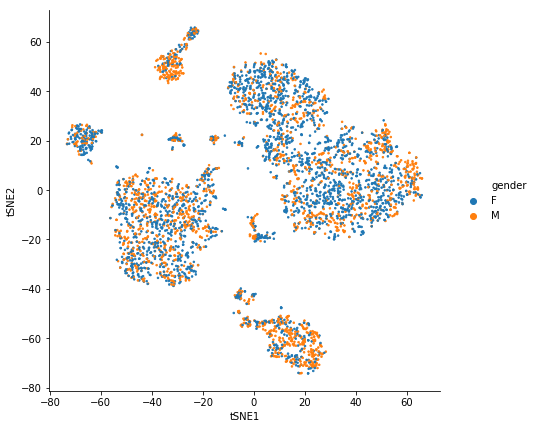

In [13]:
plot = quake_smart_seq2_heart.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Heart/gender.pdf", bbox_inches="tight")

In [14]:
%%capture capio
quake_smart_seq2_heart_models = [quake_smart_seq2_heart_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_heart_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_heart, quake_smart_seq2_heart.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Heart/model_%d" % i
    ))
quake_smart_seq2_heart_blast = cb.blast.BLAST(quake_smart_seq2_heart_models, quake_smart_seq2_heart, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_heart_blast.save("Quake_Smart-seq2_Heart")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Heart/model_1/checkpoint-171
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Heart/model_2/checkpoint-143
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Heart/model_3/checkpoint-156


In [15]:
with open("Quake_Smart-seq2_Heart/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Heart/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [16]:
utils.self_projection(quake_smart_seq2_heart_blast, "Quake_Smart-seq2_Heart")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9679
Accuracy = 0.9920


## Mouse aligned

In [17]:
if not os.path.exists("ALIGNED_Mus_musculus_Spleen"):
    os.makedirs("ALIGNED_Mus_musculus_Spleen")
quake_smart_seq2_aorta = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Aorta/data.h5").normalize()
quake_10x_heart_and_aorta.obs["quake_10x_heart_and_aorta_donor"] = \
    quake_10x_heart_and_aorta.obs["donor"]
quake_smart_seq2_heart.obs["quake_smart_seq2_heart_donor"] = \
    quake_smart_seq2_heart.obs["donor"]
quake_smart_seq2_aorta.obs["quake_smart_seq2_aorta_donor"] = \
    quake_smart_seq2_aorta.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_heart_and_aorta=quake_10x_heart_and_aorta,
    quake_smart_seq2_heart=quake_smart_seq2_heart,
    quake_smart_seq2_aorta=quake_smart_seq2_aorta
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/weil/software/conda/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [18]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,organ,organism,plate,platform,quake_10x_heart_and_aorta_donor,quake_smart_seq2_aorta_donor,quake_smart_seq2_heart_donor,region,tSNE1,tSNE2
10X_P7_4_AAACCTGCACGACGAA,endothelial cell,CL:0000115,endothelial cell,NaN,0.0,Quake_10x_Heart_and_Aorta,3-F-56,endothelial cell,F,3.097409,...,Heart and Aorta,Mus musculus,10X_P7_4,10x,3-F-56,NaN,NaN,,26.380487,12.490649
10X_P7_4_AAACCTGGTTCCACGG,fibroblast,CL:0000057,fibroblast,NaN,2.0,Quake_10x_Heart_and_Aorta,3-F-56,fibroblast,F,-3.052682,...,Heart and Aorta,Mus musculus,10X_P7_4,10x,3-F-56,NaN,NaN,,0.621147,-15.470937
10X_P7_4_AAACCTGTCTCGATGA,endothelial cell,CL:0000115,endothelial cell,NaN,0.0,Quake_10x_Heart_and_Aorta,3-F-56,endothelial cell,F,3.844582,...,Heart and Aorta,Mus musculus,10X_P7_4,10x,3-F-56,NaN,NaN,,29.148628,8.577678
10X_P7_4_AAACGGGAGCGCTCCA,erythrocyte,CL:0000232,erythrocyte,NaN,3.0,Quake_10x_Heart_and_Aorta,3-F-56,erythrocyte,F,2.053288,...,Heart and Aorta,Mus musculus,10X_P7_4,10x,3-F-56,NaN,NaN,,-30.304867,-16.463243
10X_P7_4_AAAGCAAAGTGAATTG,fibroblast,CL:0000057,fibroblast,NaN,1.0,Quake_10x_Heart_and_Aorta,3-F-56,fibroblast,F,-1.621532,...,Heart and Aorta,Mus musculus,10X_P7_4,10x,3-F-56,NaN,NaN,,-9.451029,-9.533084


In [19]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "quake_10x_heart_and_aorta_donor", \
                  "quake_smart_seq2_heart_donor", "quake_smart_seq2_aorta_donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.236, val=2.284, time elapsed=2.2s Regular save...
[DIRECTi epoch 1] train=2.218, val=2.259, time elapsed=0.7s
[DIRECTi epoch 2] train=2.181, val=2.186, time elapsed=0.8s
[DIRECTi epoch 3] train=1.847, val=1.339, time elapsed=0.8s
[DIRECTi epoch 4] train=0.808, val=0.811, time elapsed=0.7s
[DIRECTi epoch 5] train=0.712, val=0.768, time elapsed=0.8s
[DIRECTi epoch 6] train=0.709, val=0.746, time elapsed=0.8s
[DIRECTi epoch 7] train=0.707, val=0.754, time elapsed=0.8s
[DIRECTi epoch 8] train=0.706, val=0.733, time elapsed=0.8s
[DIRECTi epoch 9] train=0.701, val=0.714, time elapsed=0.8s
[DIRECTi epoch 10] train=0.671, val=0.693, time elapsed=0.8s Regular save...
[DIRECTi epoch 11] train=0.656, val=0.672, time elapsed=0.8s
[DIRECTi epoch 12] train=0.650, val=0.666, time elapsed=0.8s
[DIRECTi epoch 13] train=0.643, val=0.657, time elapsed=0.8s
[DIRECTi epoch 14] train=0.635, val=0.651, time elapsed=0.8s
[DIRECTi epoch 15] train=0.630, val=0.648, time elapsed=0.8s
[D

[  Info   ] Computing tSNE...


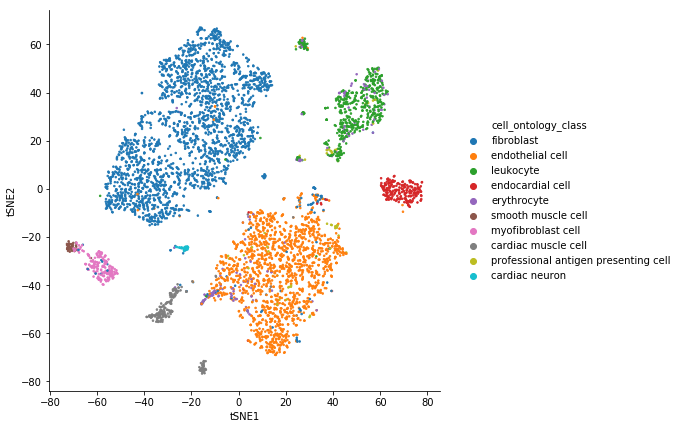

In [20]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


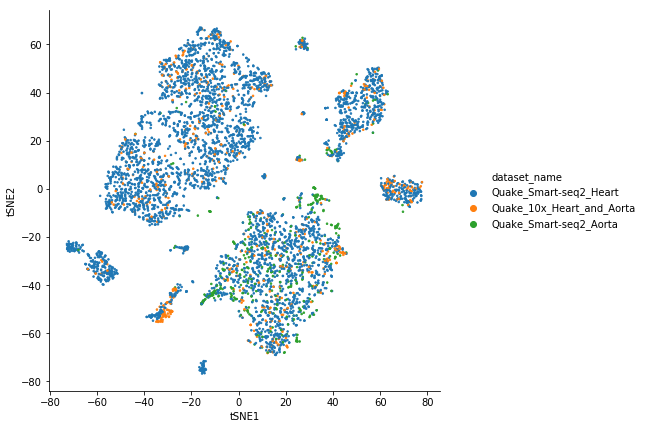

In [21]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


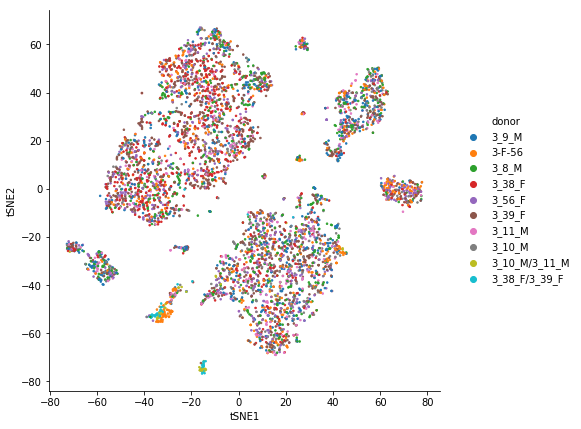

In [22]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


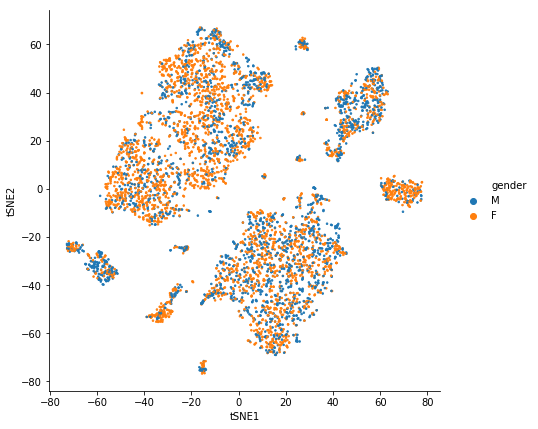

In [23]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/gender.pdf", bbox_inches="tight")

In [24]:
%%capture capio
mouse_models = [mouse_model]
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Spleen")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_1/checkpoint-121
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_2/checkpoint-114
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_3/checkpoint-126


In [25]:
with open("ALIGNED_Mus_musculus_Spleen/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Spleen/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [26]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Spleen")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9604
Accuracy = 0.9716
